# Support Vector Machines (SVM)
# HW 4

### Set up

In [3]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import pandas as pd
import os

np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt



### utility functions

In [4]:
def plot_class_regions_for_classifier_subplot(clf, X, y, X_test, y_test, title, subplot, target_names = None, plot_decision_regions = True):

    numClasses = np.amax(y) + 1
    color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    color_list_bold = ['#EEEE00', '#000000', '#00CC00', '#0000CC']
    cmap_light = ListedColormap(color_list_light[0:numClasses])
    cmap_bold  = ListedColormap(color_list_bold[0:numClasses])

    h = 0.03
    k = 0.5
    x_plot_adjust = 0.1
    y_plot_adjust = 0.1
    plot_symbol_size = 50

    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    x2, y2 = np.meshgrid(np.arange(x_min-k, x_max+k, h), np.arange(y_min-k, y_max+k, h))

    P = clf.predict(np.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)

    if plot_decision_regions:
        subplot.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8)

    subplot.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=plot_symbol_size, edgecolor = 'black')
    subplot.set_xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    subplot.set_ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)

    if (X_test is not None):
        subplot.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, s=plot_symbol_size, marker='^', edgecolor = 'black')
        train_score = clf.score(X, y)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    subplot.set_title(title)

    if (target_names is not None):
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i])
            legend_handles.append(patch)
        subplot.legend(loc=0, handles=legend_handles)


def plot_class_regions_for_classifier(clf, X, y, X_test=None, y_test=None, title=None, target_names = None, plot_decision_regions = True):

    numClasses = np.amax(y) + 1
    color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    color_list_bold = ['#EEEE00', '#000000', '#00CC00', '#0000CC']
    cmap_light = ListedColormap(color_list_light[0:numClasses])
    cmap_bold  = ListedColormap(color_list_bold[0:numClasses])

    h = 0.03
    k = 0.5
    x_plot_adjust = 0.1
    y_plot_adjust = 0.1
    plot_symbol_size = 50

    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    x2, y2 = np.meshgrid(np.arange(x_min-k, x_max+k, h), np.arange(y_min-k, y_max+k, h))

    P = clf.predict(np.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)
    plt.figure()
    if plot_decision_regions:
        plt.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=plot_symbol_size, edgecolor = 'black')
    plt.xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    plt.ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)

    if (X_test is not None):
        plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, s=plot_symbol_size, marker='^', edgecolor = 'black')
        train_score = clf.score(X, y)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    if (target_names is not None):
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i])
            legend_handles.append(patch)
        plt.legend(loc=0, handles=legend_handles)

    if (title is not None):
        plt.title(title)
    plt.show()

### Synthetic dataset 

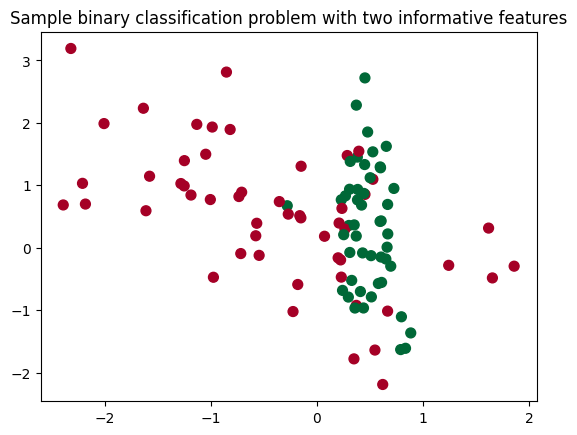

In [5]:
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])

# synthetic dataset for classification (binary) 
plt.figure()
plt.title('Sample binary classification problem with two informative features')

X, y = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)

plt.scatter(X[:, 0], X[:, 1], c=y, marker= 'o', s=50, cmap=plt.cm.RdYlGn)
plt.show()

### Linear Support Vector Machine

              precision    recall  f1-score   support

           0       0.91      0.67      0.77        15
           1       0.64      0.90      0.75        10

    accuracy                           0.76        25
   macro avg       0.78      0.78      0.76        25
weighted avg       0.80      0.76      0.76        25



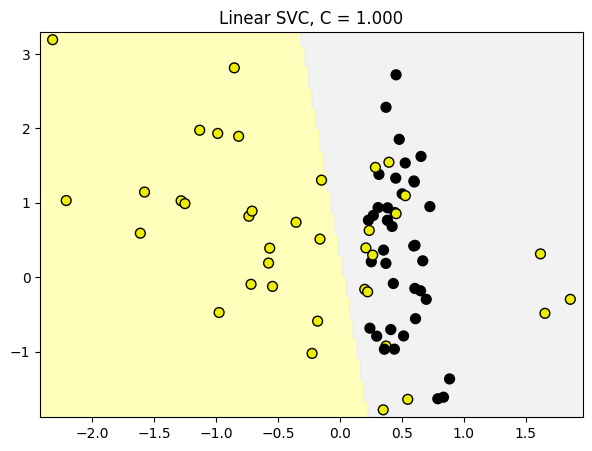

In [6]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

clf = SVC(kernel = 'linear', C=1.0).fit(X_train, y_train)

y_pred = clf.predict(X_test)

result_metrics = classification_report(y_test, y_pred)
print(result_metrics)

fig, subaxes = plt.subplots(1, 1, figsize=(7, 5))

title = 'Linear SVC, C = {:.3f}'.format(1.0)
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, None, None, title, subaxes)

### Linear Support Vector Machine: C parameter

- C is regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.

C:\Users\priya\AppData\Roaming\Python\Python312\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\priya\AppData\Roaming\Python\Python312\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\priya\AppData\Roaming\Python\Python312\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.91      0.67      0.77        15
           1       0.64      0.90      0.75        10

    accuracy                           0.76        25
   macro avg       0.78      0.78      0.76        25
weighted avg       0.80      0.76      0.76        25

              precision    recall  f1-score   support

           0       0.92      0.73      0.81        15
           1       0.69      0.90      0.78        10

    accuracy                           0.80        25
   macro avg       0.80      0.82      0.80        25
weighted avg       0.83      0.80      0.80        25



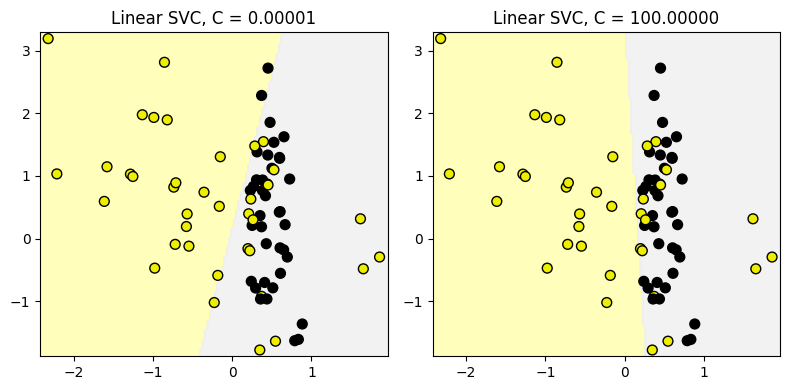

In [7]:
from sklearn.svm import LinearSVC

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
this_C = 1.0

fig, subaxes = plt.subplots(1, 2, figsize=(8, 4))

for this_C, subplot in zip([0.00001, 100], subaxes):
    clf = LinearSVC(C=this_C, max_iter=1000).fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    result_metrics = classification_report(y_test, y_pred)
    print(result_metrics)
    
    title = 'Linear SVC, C = {:.5f}'.format(this_C)
    plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                             None, None, title, subplot)
plt.tight_layout()

### Kernelized Support Vector Machines

- More complex synthetic dataset

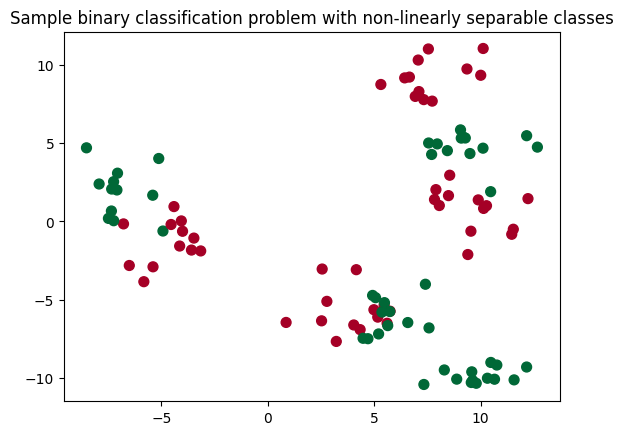

In [8]:
# more difficult synthetic dataset for classification (binary) 
# with classes that are not linearly separable
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2

plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=50, cmap=plt.cm.RdYlGn)
plt.show()

### Classification using kernels

#### RBF kernel (Gaussian kernel)
#### Polynomial kernel

RBF kernel (Gaussian) results
               precision    recall  f1-score   support

           0       0.62      1.00      0.76        13
           1       1.00      0.33      0.50        12

    accuracy                           0.68        25
   macro avg       0.81      0.67      0.63        25
weighted avg       0.80      0.68      0.64        25

Polynomial kernel results
               precision    recall  f1-score   support

           0       0.63      0.92      0.75        13
           1       0.83      0.42      0.56        12

    accuracy                           0.68        25
   macro avg       0.73      0.67      0.65        25
weighted avg       0.73      0.68      0.66        25



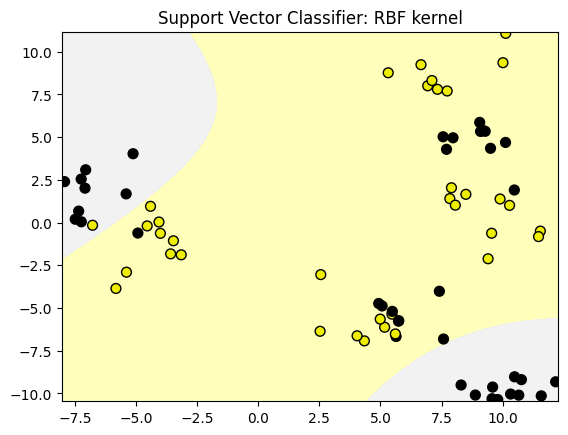

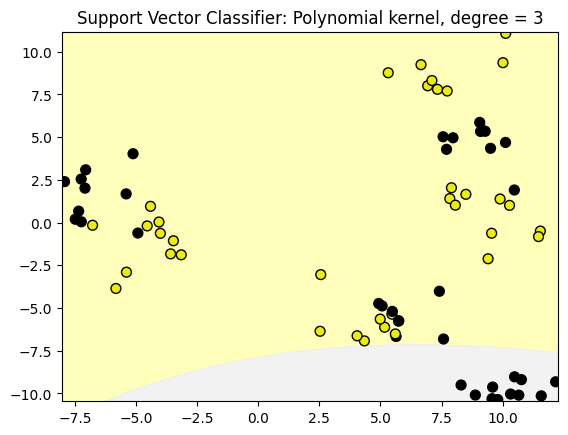

In [9]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)

clf1 = SVC(max_iter=10000).fit(X_train, y_train)
y_pred = clf1.predict(X_test)

result_metrics = classification_report(y_test, y_pred)
print('RBF kernel (Gaussian) results\n', result_metrics)


clf2 = SVC(kernel='poly', max_iter=10000).fit(X_train, y_train)
y_pred = clf2.predict(X_test)

result_metrics = classification_report(y_test, y_pred)
print('Polynomial kernel results\n', result_metrics)

# The default SVC kernel is radial basis function (RBF)
plot_class_regions_for_classifier(SVC().fit(X_train, y_train),
                                 X_train, y_train, None, None,
                                 'Support Vector Classifier: RBF kernel')

# Compare decision boundries with polynomial kernel, degree = 3
plot_class_regions_for_classifier(SVC(kernel = 'poly', degree = 3)
                                 .fit(X_train, y_train), X_train,
                                 y_train, None, None,
                                 'Support Vector Classifier: Polynomial kernel, degree = 3')

### Support Vector Machine with RBF kernel: gamma parameter

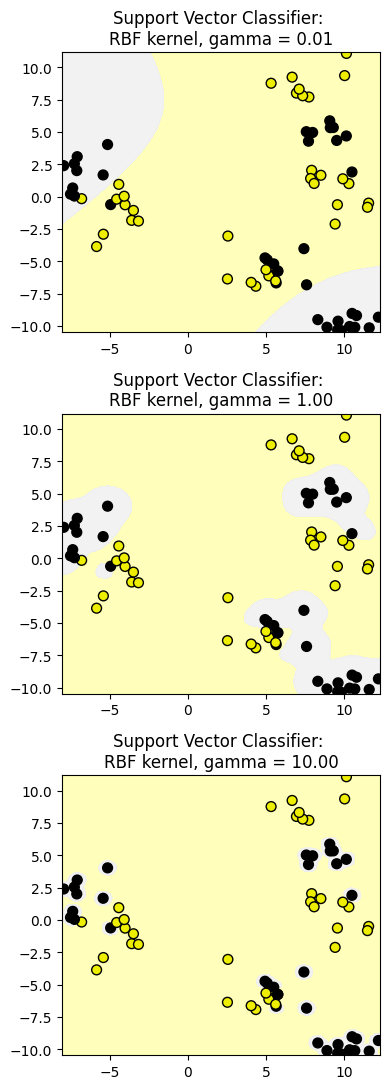

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)
fig, subaxes = plt.subplots(3, 1, figsize=(4, 11))

for this_gamma, subplot in zip([0.01, 1.0, 10.0], subaxes):
    clf = SVC(kernel = 'rbf', gamma=this_gamma).fit(X_train, y_train)
    
    title = 'Support Vector Classifier: \nRBF kernel, gamma = {:.2f}'.format(this_gamma)
    plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                             None, None, title, subplot)
    plt.tight_layout()

### Support Vector Machine with RBF kernel: using both C and gamma parameter

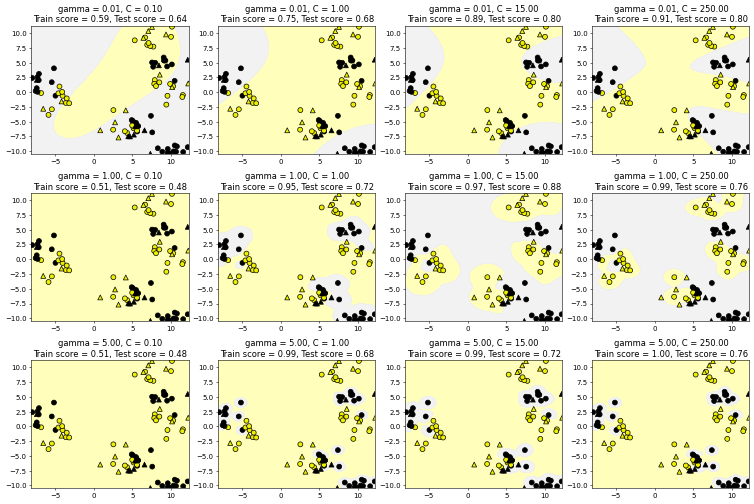

In [11]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)
fig, subaxes = plt.subplots(3, 4, figsize=(15, 10), dpi=50)

for this_gamma, this_axis in zip([0.01, 1, 5], subaxes):
    
    for this_C, subplot in zip([0.1, 1, 15, 250], this_axis):
        title = 'gamma = {:.2f}, C = {:.2f}'.format(this_gamma, this_C)
        clf = SVC(kernel = 'rbf', gamma = this_gamma,
                 C = this_C).fit(X_train, y_train)
        plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                                 X_test, y_test, title,
                                                 subplot)
        plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

 # NAME : PRIYADARSHINI SHANMUGASUNDARAM MURUGAN

# HW 4 ============================
Part 1:


# Breast cancer dataset for classification

Apply SVM linear kernel (basically no kernel) and print the performance metrics.

Apply SVM RBF kernel (Gaussian kernel) and print the performance metrics with non-normalized dataset.

Apply SVM RBF kernel with normalized dataset.

Apply SVM RBF kernel using varying C and gamma parameter values. Use C= 0.1, 1, 15, 250.  Use gamma= 0.01, 1, 5.  Hence, 12 subplots,  similar to the above example, should be drawn. 

Part 2:

Write a short comparisons of SVM linear kernel and RBF kernel.

Write a short summary of how C and gamma parameters play in SVM RBF kernel.



# PART 1

# Breast cancer dataset for classification

In [12]:
from sklearn.datasets import load_breast_cancer

# Breast cancer dataset for classification
cancer = load_breast_cancer()
#(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

In [13]:
# Breast cancer dataset for classification
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)
print("Breast Cancer Dataset Information:")
print("-----------------------------------")
print("Number of samples:", X_cancer.shape[0])
print("Number of features:", X_cancer.shape[1])
print("Target classes:", np.unique(y_cancer))


Breast Cancer Dataset Information:
-----------------------------------
Number of samples: 569
Number of features: 30
Target classes: [0 1]


In [14]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

Synthetic dataset

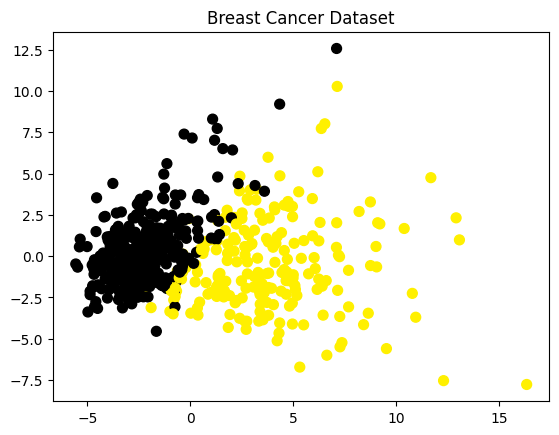

In [15]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load breast cancer dataset
#cancer = load_breast_cancer()
X_cancer, y_cancer = cancer.data, cancer.target

# Standardize the features
scaler = StandardScaler()
X_cancer_scaled = scaler.fit_transform(X_cancer)

# Apply PCA for dimensionality reduction to 2 dimensions
pca = PCA(n_components=2)
X_cancer_pca = pca.fit_transform(X_cancer_scaled)

# Define a custom colormap
cmap_bold = ListedColormap(['#FFF000', '#000000'])

# Plot the breast cancer dataset
plt.figure()
plt.title('Breast Cancer Dataset')
plt.scatter(X_cancer_pca[:, 0], X_cancer_pca[:, 1], c=y_cancer, marker='o', s=50, cmap=cmap_bold)
plt.show()


# Apply SVM Linear (No kernel) and Print the performance metrics

In [16]:
def plot_for_classifier_subplot(clf, X, y, X_test, y_test, title, subplot, target_names=None, plot_decision_regions=True):

    numClasses = np.amax(y) + 1
    color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    color_list_bold = ['#EEEE00', '#000000', '#00CC00', '#0000CC']
    cmap_light = ListedColormap(color_list_light[0:numClasses])
    cmap_bold = ListedColormap(color_list_bold[0:numClasses])

    h = 0.03
    k = 0.5
    x_plot_adjust = 0.1
    y_plot_adjust = 0.1
    plot_symbol_size = 50

    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    x2, y2 = np.meshgrid(np.arange(x_min - k, x_max + k, h), np.arange(y_min - k, y_max + k, h))

    P = clf.predict(np.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)

    if plot_decision_regions:
        subplot.contourf(x2, y2, P, cmap=cmap_light, alpha=0.8)

    subplot.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=plot_symbol_size, edgecolor='black')
    subplot.set_xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    subplot.set_ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)

    if X_test is not None:
        subplot.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, s=plot_symbol_size, marker='^', edgecolor='black')
        train_score = clf.score(X, y)
        test_score = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    subplot.set_title(title)

    if target_names is not None:
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i])
            legend_handles.append(patch)
        subplot.legend(loc=0, handles=legend_handles)


Accuracy: 0.9912280701754386

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.99      1.00      0.99        71

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



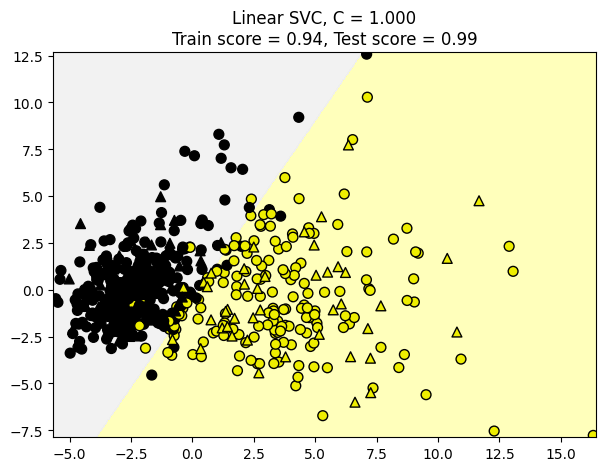

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_cancer_pca, y_cancer, test_size=0.2, random_state=42)

# Create SVM classifier with linear kernel
svm_linear = SVC(kernel='linear',C=1.0)

# Train the classifier
svm_linear.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_linear.predict(X_test)

# Print performance metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

fig, subaxes = plt.subplots(1, 1, figsize=(7, 5))

title = 'Linear SVC, C = {:.3f}'.format(1.0)

plot_for_classifier_subplot(svm_linear, X_train, y_train, X_test, y_test, title, subaxes)




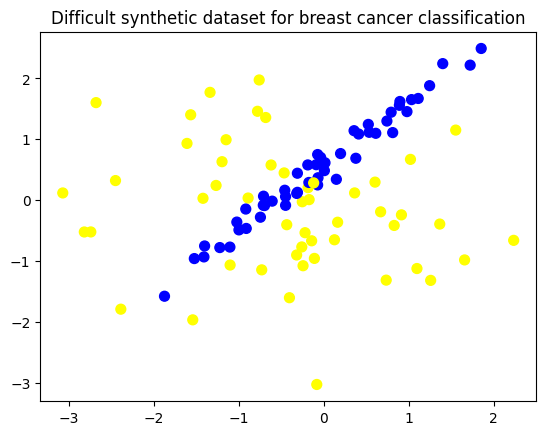

In [18]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Generate synthetic data with non-linearly separable classes
X_cancer_difficult, y_cancer_difficult = make_classification(n_samples=100, n_features=2, n_informative=2, 
                                                             n_redundant=0, n_clusters_per_class=1,
                                                             flip_y=0, class_sep=0.3, random_state=4)

# Define a custom colormap
cmap_bold = ListedColormap(['#FFFF00', '#0000FF'])

# Plot the difficult synthetic dataset
plt.figure()
plt.title('Difficult synthetic dataset for breast cancer classification')
plt.scatter(X_cancer_difficult[:, 0], X_cancer_difficult[:, 1], c=y_cancer_difficult,
            marker='o', s=50, cmap=cmap_bold)
plt.show()


Apply SVM RBF kernel (Gaussian kernel) and print the performance metrics with non-normalized dataset.

Accuracy: 0.8

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.71      0.83        14
           1       0.60      1.00      0.75         6

    accuracy                           0.80        20
   macro avg       0.80      0.86      0.79        20
weighted avg       0.88      0.80      0.81        20



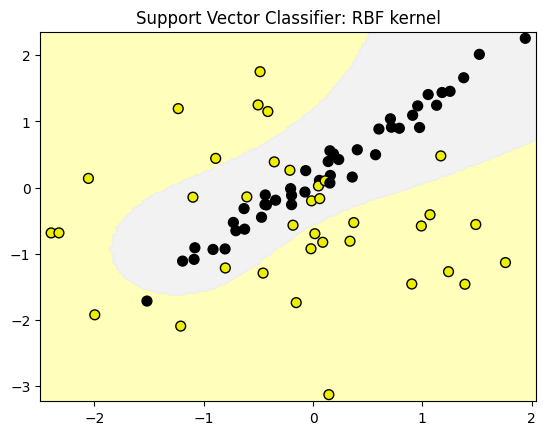

In [19]:
# Standardize the features
scaler = StandardScaler()

X_cancer_difficult_scaled = scaler.fit_transform(X_cancer_difficult)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_cancer_difficult_scaled, y_cancer_difficult, test_size=0.2, random_state=42)

# Create SVM classifier with RBF kernel
svm_rbf= SVC(kernel='rbf', C=1.0)

# Train the classifier
svm_rbf.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_rbf.predict(X_test)

# Print performance metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# The default SVC kernel is radial basis function (RBF)
plot_class_regions_for_classifier(svm_rbf,
                                 X_train, y_train, None, None,
                                 'Support Vector Classifier: RBF kernel')


# Apply SVM RBF kernel with normalized dataset.

Accuracy: 0.8

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.71      0.83        14
           1       0.60      1.00      0.75         6

    accuracy                           0.80        20
   macro avg       0.80      0.86      0.79        20
weighted avg       0.88      0.80      0.81        20



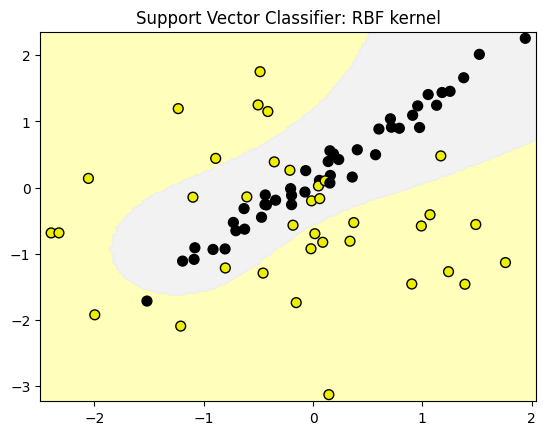

In [20]:
# Standardize the features
scaler = StandardScaler()
X_cancer_difficult_scaled = scaler.fit_transform(X_cancer_difficult)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_cancer_difficult_scaled, y_cancer_difficult, test_size=0.2, random_state=42)

# Create SVM classifier with RBF kernel
svm_rbf_normalized = SVC(kernel='rbf', C=1.0)

# Train the classifier
svm_rbf_normalized.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_rbf_normalized.predict(X_test)

# Print performance metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# The default SVC kernel is radial basis function (RBF)
plot_class_regions_for_classifier(svm_rbf_normalized,
                                 X_train, y_train, None, None,
                                 'Support Vector Classifier: RBF kernel')


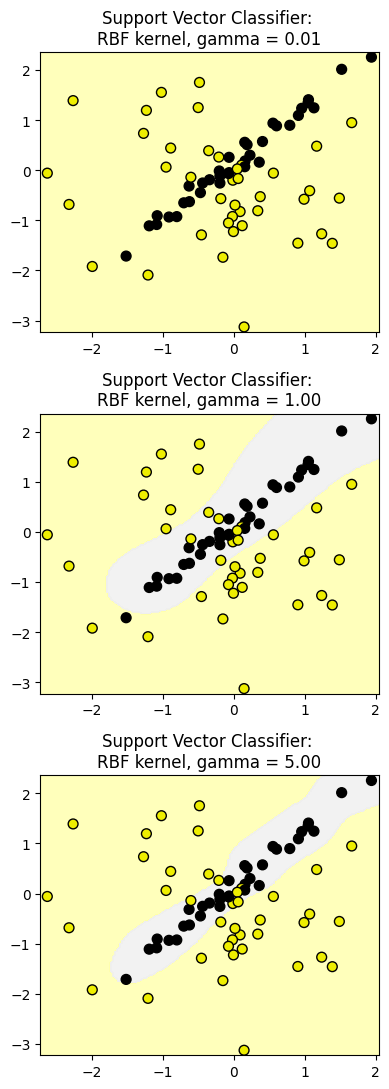

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_cancer_difficult_scaled, y_cancer_difficult, random_state = 0)
fig, subaxes = plt.subplots(3, 1, figsize=(4, 11))

for this_gamma, subplot in zip([0.01, 1.0, 5.0], subaxes):
    clf = SVC(kernel = 'rbf', gamma=this_gamma).fit(X_train, y_train)
    
    title = 'Support Vector Classifier: \nRBF kernel, gamma = {:.2f}'.format(this_gamma)
    plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                             None, None, title, subplot)
    plt.tight_layout()

Apply SVM RBF kernel using varying C and gamma parameter values. Use C= 0.1, 1, 15, 250.  Use gamma= 0.01, 1, 5.  Hence, 12 subplots,  similar to the above example, should be drawn. 

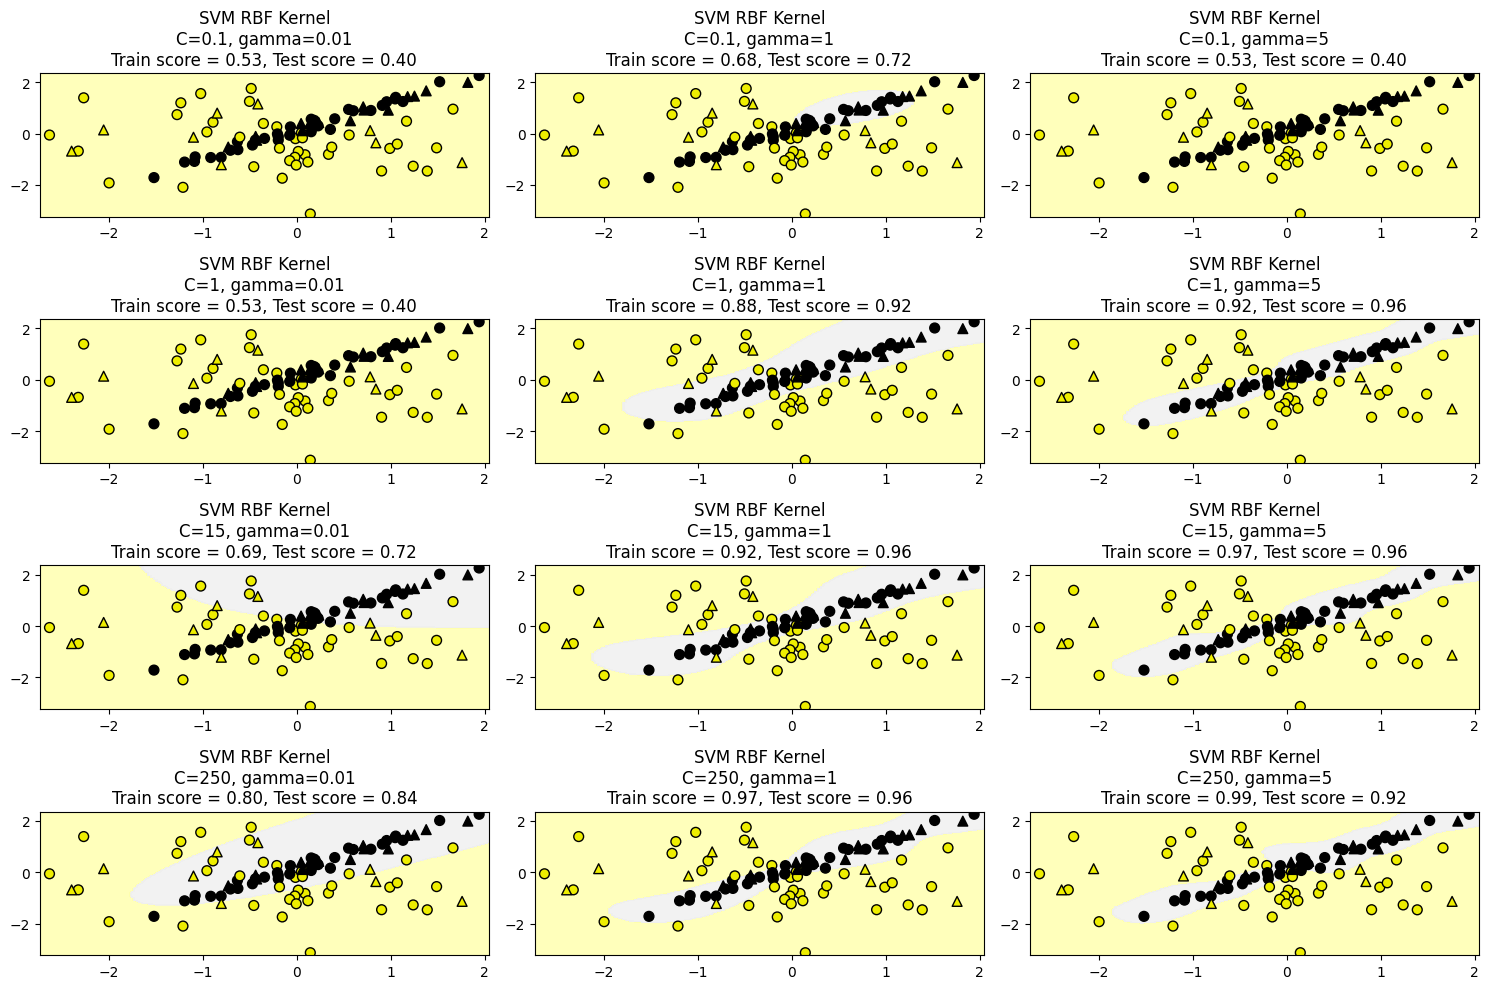

In [22]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Define the range of C and gamma values
C_values = [0.1, 1, 15, 250]
gamma_values = [0.01, 1, 5]

# Create subplots
fig, subaxes = plt.subplots(len(C_values), len(gamma_values), figsize=(15, 10))

# Iterate over each combination of C and gamma values
for i, C in enumerate(C_values):
    for j, gamma in enumerate(gamma_values):
        # Train the SVM classifier with RBF kernel
        clf = SVC(kernel='rbf', C=C, gamma=gamma).fit(X_train, y_train)
        
        # Generate title for the subplot
        title = f'SVM RBF Kernel\nC={C}, gamma={gamma}'
        
        # Plot decision regions for the classifier
        plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                                  X_test, y_test, title,
                                                  subaxes[i, j])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


# PART 2

## Write a short comparisons of SVM linear kernel and RBF kernel.

Linear Kernel:
   - The linear kernel computes a decision boundary as a straight line, making it suitable for datasets with linear separability.
   - It is optimal for scenarios where classes can be cleanly separated by a single hyperplane.
   - Due to its simplicity, the linear kernel is computationally efficient, making it preferable for large-scale datasets.
   - It performs well when the number of features is high relative to the number of samples.

 RBF (Radial Basis Function) Kernel:
   - The RBF kernel computes a non-linear decision boundary, allowing for the capture of complex relationships between features and target classes.
   - It is effective for datasets with non-linear separability, where classes are not easily separated by a linear boundary.
   - The RBF kernel's flexibility comes with two important hyperparameters: C and gamma. C balances margin maximization and classification error minimization, while gamma controls the influence of individual training examples.
   - It is capable of handling intricate datasets by capturing fine-grained details in the data.

The choice between linear and RBF kernels depends on the dataset's nature and the desired complexity of the decision boundary. Linear kernel is straightforward and computationally efficient, suitable for simpler datasets with linear separability. In contrast, the RBF kernel offers more flexibility and can handle complex relationships, making it preferable for datasets with non-linear separability.


## Write a short summary of how C and gamma parameters play in SVM RBF kernel.


The C parameter in SVM with RBF kernel plays a pivotal role in controlling the trade-off between achieving a smooth decision boundary and accurately classifying training data points. A smaller value of C leads to a softer margin, allowing more misclassifications but potentially increasing the model's generalization ability.A larger value of C results in a narrower margin, aiming to correctly classify more training samples, which may lead to overfitting if set too high.Tuning C allows balancing between bias and variance in the model, with smaller C values promoting a more flexible decision boundary and larger C values promoting a more strict boundary.

In the context of the breast cancer dataset, smaller C values allow for a more flexible decision boundary, potentially capturing subtle patterns in the data. However, this flexibility might lead to misclassification of some training examples, particularly outliers or noisy data points. Conversely, larger C values impose a stricter penalty for misclassification, resulting in a decision boundary that aims to correctly classify as many training examples as possible. However, this could lead to a narrower margin between classes and potential overfitting, especially if the dataset contains noise or outliers.

On the other hand, the gamma parameter determines the influence of individual training examples on the shape of the decision boundary. In the context of the breast cancer dataset, smaller gamma values result in a smoother decision boundary, which could be advantageous for datasets with a relatively simple structure or when overfitting is a concern. Conversely, larger gamma values lead to a more complex decision boundary that closely fits the training data, potentially resulting in overfitting, particularly if the dataset is noisy or contains outliers.A smaller value of gamma results in a smoother decision boundary, with points further away from the decision boundary having less influence.Tuning gamma allows controlling the model's complexity, with smaller gamma values promoting smoother decision boundaries and larger gamma values promoting more complex boundaries.

Overall, effectively tuning the C and gamma parameters in SVM with RBF kernel for the breast cancer dataset is crucial for achieving a balance between model complexity and generalization ability. This often requires careful experimentation and validation, using techniques such as cross-validation, to find the optimal values that yield the best classification performance and robustness on unseen data.


# Part 3

Reflection

Working with Support Vector Machines (SVMs) offered valuable insights into the fundamental concepts of machine learning algorithms, particularly the capacity of SVMs to discern optimal decision boundaries. Exploring hyperparameters such as C and gamma underscored the significance of hyperparameter tuning in machine learning, demonstrating how different parameter configurations influence model performance and generalization capabilities.

Visualizing decision boundaries provided a tangible understanding of how hyperparameters impact model behavior, offering a visual representation of their effects on the model's decision-making process. However, fine-tuning hyperparameters like C and gamma posed challenges, requiring iterative experimentation and validation, especially for larger datasets, which can be time-consuming and computationally demanding.

Assessing model performance and interpreting the results presented essential yet intricate tasks. It involved evaluating multiple performance metrics, comprehending their implications, and making informed decisions aligned with the specific problem domain. This process underscored the importance of continual learning and exploration in machine learning, highlighting the necessity of staying abreast of new techniques, tools, and best practices to effectively address complex modeling tasks.

Conclusion

The experimentation with different C and gamma values in SVM models employing the RBF kernel has yielded insightful conclusions. Firstly, the C parameter significantly influences the decision boundary's smoothness and margin width. Smaller C values yield smoother decision boundaries with wider margins, fostering higher bias and lower variance. Conversely, larger C values result in tighter boundaries, aiming to accurately classify more training examples, potentially enhancing performance but increasing the risk of overfitting.

Secondly, the gamma parameter plays a pivotal role in shaping the decision boundary's complexity. Smaller gamma values produce smoother boundaries with reduced influence from individual data points, suitable for simpler datasets or scenarios with numerous samples. On the other hand, larger gamma values lead to more intricate boundaries closely aligned with the training data, beneficial for capturing intricate patterns but posing a higher risk of overfitting.

The interplay between C and gamma underscores the delicate balance between bias and variance, necessitating careful parameter tuning. Achieving optimal performance often entails iterative experimentation and validation, leveraging techniques like grid search or randomized search to explore various parameter combinations effectively.

In summary, the choice of C and gamma values profoundly impacts the SVM model's complexity, bias-variance trade-off, and generalization capability. Understanding their interaction and discerning their effects on the decision boundary are paramount for developing robust classifiers across diverse machine learning tasks.